In [32]:
%matplotlib inline
    
import os
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from datetime import date, datetime

import warnings
warnings.filterwarnings('ignore')

In [136]:
TRAIN_FILENAME = 'features_2019.csv'
TRAIN_OUTPUT_FILENAME = 'train_dataset.csv'

VALID_FILENAME = 'features_2020.csv'
VALID_OUTPUT_FILENAME = 'valid_dataset.csv'

In [138]:
list(zip([TRAIN_FILENAME, VALID_FILENAME], [TRAIN_OUTPUT_FILENAME, VALID_OUTPUT_FILENAME]))


[('features_2019.csv', 'train_dataset.csv'),
 ('features_2020.csv', 'valid_dataset.csv')]

In [65]:
df = pd.read_csv('../data/features_2020.csv', sep='|', dtype='str')
df.columns = [el.split('.')[1] for el in df.columns]
df = df.fillna(0)

In [90]:
df.isnull().sum()

kn_individu_national            0
had_pcs                         0
had_same_pcs                    0
had_pcs_proche                  0
pcs_counter                     0
                               ..
six_months_evenmtperso_count    0
six_months_evenmtperso_sum      0
six_months_maladie_count        0
six_months_maladie_sum          0
has_rome                        0
Length: 67, dtype: int64

In [67]:
df[df.label == '1'].had_pcs.value_counts()

1    1740
Name: had_pcs, dtype: int64

In [35]:
df.label.value_counts()

0    118440
1      1740
Name: label, dtype: int64

In [107]:
df.label.value_counts() / len(df)

0    0.850876
1    0.149124
Name: label, dtype: float64

In [68]:
df['has_rome'] = 0
df.at[df.rome_profil == 'N1103', 'has_rome'] = 1

In [38]:
df[df.label == '1'].has_rome.value_counts() / len(df[df.label == '1'])

0    0.864943
1    0.135057
Name: has_rome, dtype: float64

In [70]:
df[df.label == '1'].had_same_pcs.value_counts() / len(df[df.label == '1'])

1    0.995742
0    0.004258
Name: had_same_pcs, dtype: float64

In [103]:
df = df[(df.dn_toprechercheemploi == '1') &
         (df.dn_topstage == '0') &
        (df.dn_topmaladie == '0') &
        (df.dn_topmaternite == '0') &
        (df.dn_topretraite == '0') &
        (df.dn_topinvalidite == '0') &
        ((df.had_same_pcs == '1') | ((df.had_pcs == '1') & (df.rome_profil == 'N1103')))]

In [104]:
df.columns.tolist()

['kn_individu_national',
 'had_pcs',
 'had_same_pcs',
 'had_pcs_proche',
 'pcs_counter',
 'naf_counter',
 'dc_typepec_id',
 'dc_soustypepec',
 'delta_dateinscriptionpec',
 'dc_categoriede_id',
 'dc_motifinscription_id',
 'dc_situationanterieure_id',
 'previous_typepec',
 'delta_previous_dateinscriptionpec',
 'previous_soustypepec',
 'previous_categoriede',
 'previous_motifinscription',
 'typepec_count',
 'ale_count',
 'numpec_count',
 'montant_indem',
 'duree_indem',
 'delta_fin_indem',
 'ouverturedroit_count',
 'reprisedroit_count',
 'rome_profil',
 'temps',
 'sitmat',
 'mobdist',
 'mobunit',
 'nb_enf',
 'qualif',
 'nivfor',
 'rome_profil_count',
 'has_rome_proche',
 'ami_entrants_count',
 'label',
 'will_pcs',
 'will_pcs_proche',
 'h_trav_m',
 's_trav_m',
 'dn_topstage',
 'dn_topmaladie',
 'dn_topmaternite',
 'dn_topretraite',
 'dn_topinvalidite',
 'dn_toprechercheemploi',
 'three_months_h_trav',
 'three_months_s_trav',
 'six_months_h_trav',
 'six_months_s_trav',
 'delta_last_periode

In [42]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [111]:
categ_list = [
 'dc_typepec_id',
 'dc_soustypepec',
 'dc_categoriede_id',
 'dc_motifinscription_id',
 'dc_situationanterieure_id',
 'previous_typepec',
 'previous_soustypepec',
 'previous_categoriede',
 'previous_motifinscription',
 'had_same_pcs',
 'had_pcs_proche',
 #'rome_profil',
 'temps',
 'sitmat',
 'mobdist',
 'mobunit',
 'qualif',
 'nivfor',
 'has_rome',
 'has_rome_proche',
 'will_pcs',
 'will_pcs_proche',
]

num_list = [
 'delta_dateinscriptionpec',
 'delta_previous_dateinscriptionpec',
 'h_trav_m',
 's_trav_m',
 'three_months_h_trav',
 'three_months_s_trav',
 'six_months_h_trav',
 'six_months_s_trav',
 'delta_last_periodeact',
 'periodeactgaec_total_count',
 'typeperiodegaec_total_count',
 'origineinformationgaec_total_count',
 'three_months_periodeact_count',
 'three_months_quantiteact_sum',
 'six_months_periodeact_count',
 'six_months_quantiteact_sum',
 'six_months_evenmtperso_count',
 'six_months_evenmtperso_sum',
 'six_months_maladie_count',
 'six_months_maladie_sum',
 'last_typeperiodegaec',
 'last_quantiteactivite',
 'last_uniteactivite',
 'pcs_counter',
 'naf_counter',
 'typepec_count',
 'ale_count',
 'numpec_count',
 'montant_indem',
 'duree_indem',
 'delta_fin_indem',
 'ouverturedroit_count',
 'reprisedroit_count',
 'nb_enf',
 'rome_profil_count',
 'ami_entrants_count',
 'mobdist',
]

In [112]:
for el in num_list:
    df[el] = df[el].astype(float)

In [133]:
df0 = df[df.label == '0']
df1 = df[df.label == '1']

In [106]:
len(df1), len(df0)

(1550, 8844)

In [78]:
df.six_months_periodeact_count.value_counts() / len(df)

0.0     0.944330
4.0     0.014007
1.0     0.013648
2.0     0.010057
3.0     0.009967
5.0     0.004041
6.0     0.001706
7.0     0.001437
8.0     0.000359
9.0     0.000180
13.0    0.000180
10.0    0.000090
Name: six_months_periodeact_count, dtype: float64

In [47]:
df1.six_months_periodeact_count.value_counts() / len(df1)

0.0    0.954988
4.0    0.012774
1.0    0.008516
3.0    0.007908
2.0    0.007908
5.0    0.004866
7.0    0.001217
8.0    0.001217
6.0    0.000608
Name: six_months_periodeact_count, dtype: float64

In [114]:
for el in num_list:
    print(el)
    print(df0[el].quantile(0.25), df0[el].median(), df0[el].quantile(0.75))
    print(df1[el].quantile(0.25), df1[el].median(), df1[el].quantile(0.75))
    print('\n')

delta_dateinscriptionpec
-357.0 -195.0 -93.0
-401.75 -210.5 -95.0


delta_previous_dateinscriptionpec
-872.0 -528.0 -266.0
-858.0 -520.0 -287.0


h_trav_m
0.0 0.0 10500.0
0.0 0.0 12075.0


s_trav_m
0.0 0.0 95000.0
0.0 0.0 113875.0


three_months_h_trav
0.0 0.0 15700.0
0.0 2700.0 18700.0


three_months_s_trav
0.0 0.0 151000.0
0.0 0.0 181575.0


six_months_h_trav
0.0 8500.0 32700.0
0.0 12900.0 38775.0


six_months_s_trav
0.0 60000.0 322825.0
0.0 88650.0 389500.0


delta_last_periodeact
-194.25 -93.0 -32.0
-171.0 -65.5 -32.0


periodeactgaec_total_count
10.0 21.0 37.0
21.0 36.0 54.0


typeperiodegaec_total_count
2.0 3.0 4.0
2.0 3.0 3.0


origineinformationgaec_total_count
3.0 4.0 5.0
3.0 4.0 4.0


three_months_periodeact_count
0.0 0.0 0.0
0.0 0.0 0.0


three_months_quantiteact_sum
0.0 0.0 0.0
0.0 0.0 0.0


six_months_periodeact_count
0.0 0.0 0.0
0.0 0.0 0.0


six_months_quantiteact_sum
0.0 0.0 0.0
0.0 0.0 0.0


six_months_evenmtperso_count
0.0 0.0 0.0
0.0 0.0 0.0


six_months_evenmtperso_

In [125]:
num_col_to_keep = [
 'delta_dateinscriptionpec',
 'delta_previous_dateinscriptionpec',
 'h_trav_m',
 's_trav_m',
 'three_months_h_trav',
 'three_months_s_trav',
 'six_months_h_trav',
 'six_months_s_trav',
 'delta_last_periodeact',
 'periodeactgaec_total_count',
 'last_quantiteactivite',
 'pcs_counter',
 'montant_indem',
 'duree_indem',
 'delta_fin_indem',   
]

In [80]:
def bar_plot_graph(df1, df2, col_list, figsize):
    """Plot bar plot graph for a list of categorical columns in the dataframe.
    """
    ncol = 2
    nrow = len(col_list)
    _, axes = plt.subplots(nrow, ncol, figsize=figsize)
    k = 0

    for j in range(nrow):
        (df1[col_list[k]].value_counts()/len(df1)).plot(kind='bar', title=col_list[k], figsize=figsize, ax=axes[j, 0],
                                             color='teal', alpha=0.7)
        (df2[col_list[k]].value_counts()/len(df2)).plot(kind='bar', title=col_list[k], figsize=figsize, ax=axes[j, 1],
                                             color='coral', alpha=0.7)
        k = k+1
    plt.tight_layout()

In [119]:
categ_col_to_keep = [
 'dc_motifinscription_id',
 'previous_typepec',
 'previous_soustypepec',
 'previous_categoriede',
 'previous_motifinscription',
 'had_pcs_proche',
 'had_same_pcs',
 'qualif',
 'nivfor',
 'has_rome',
 'has_rome_proche'
]

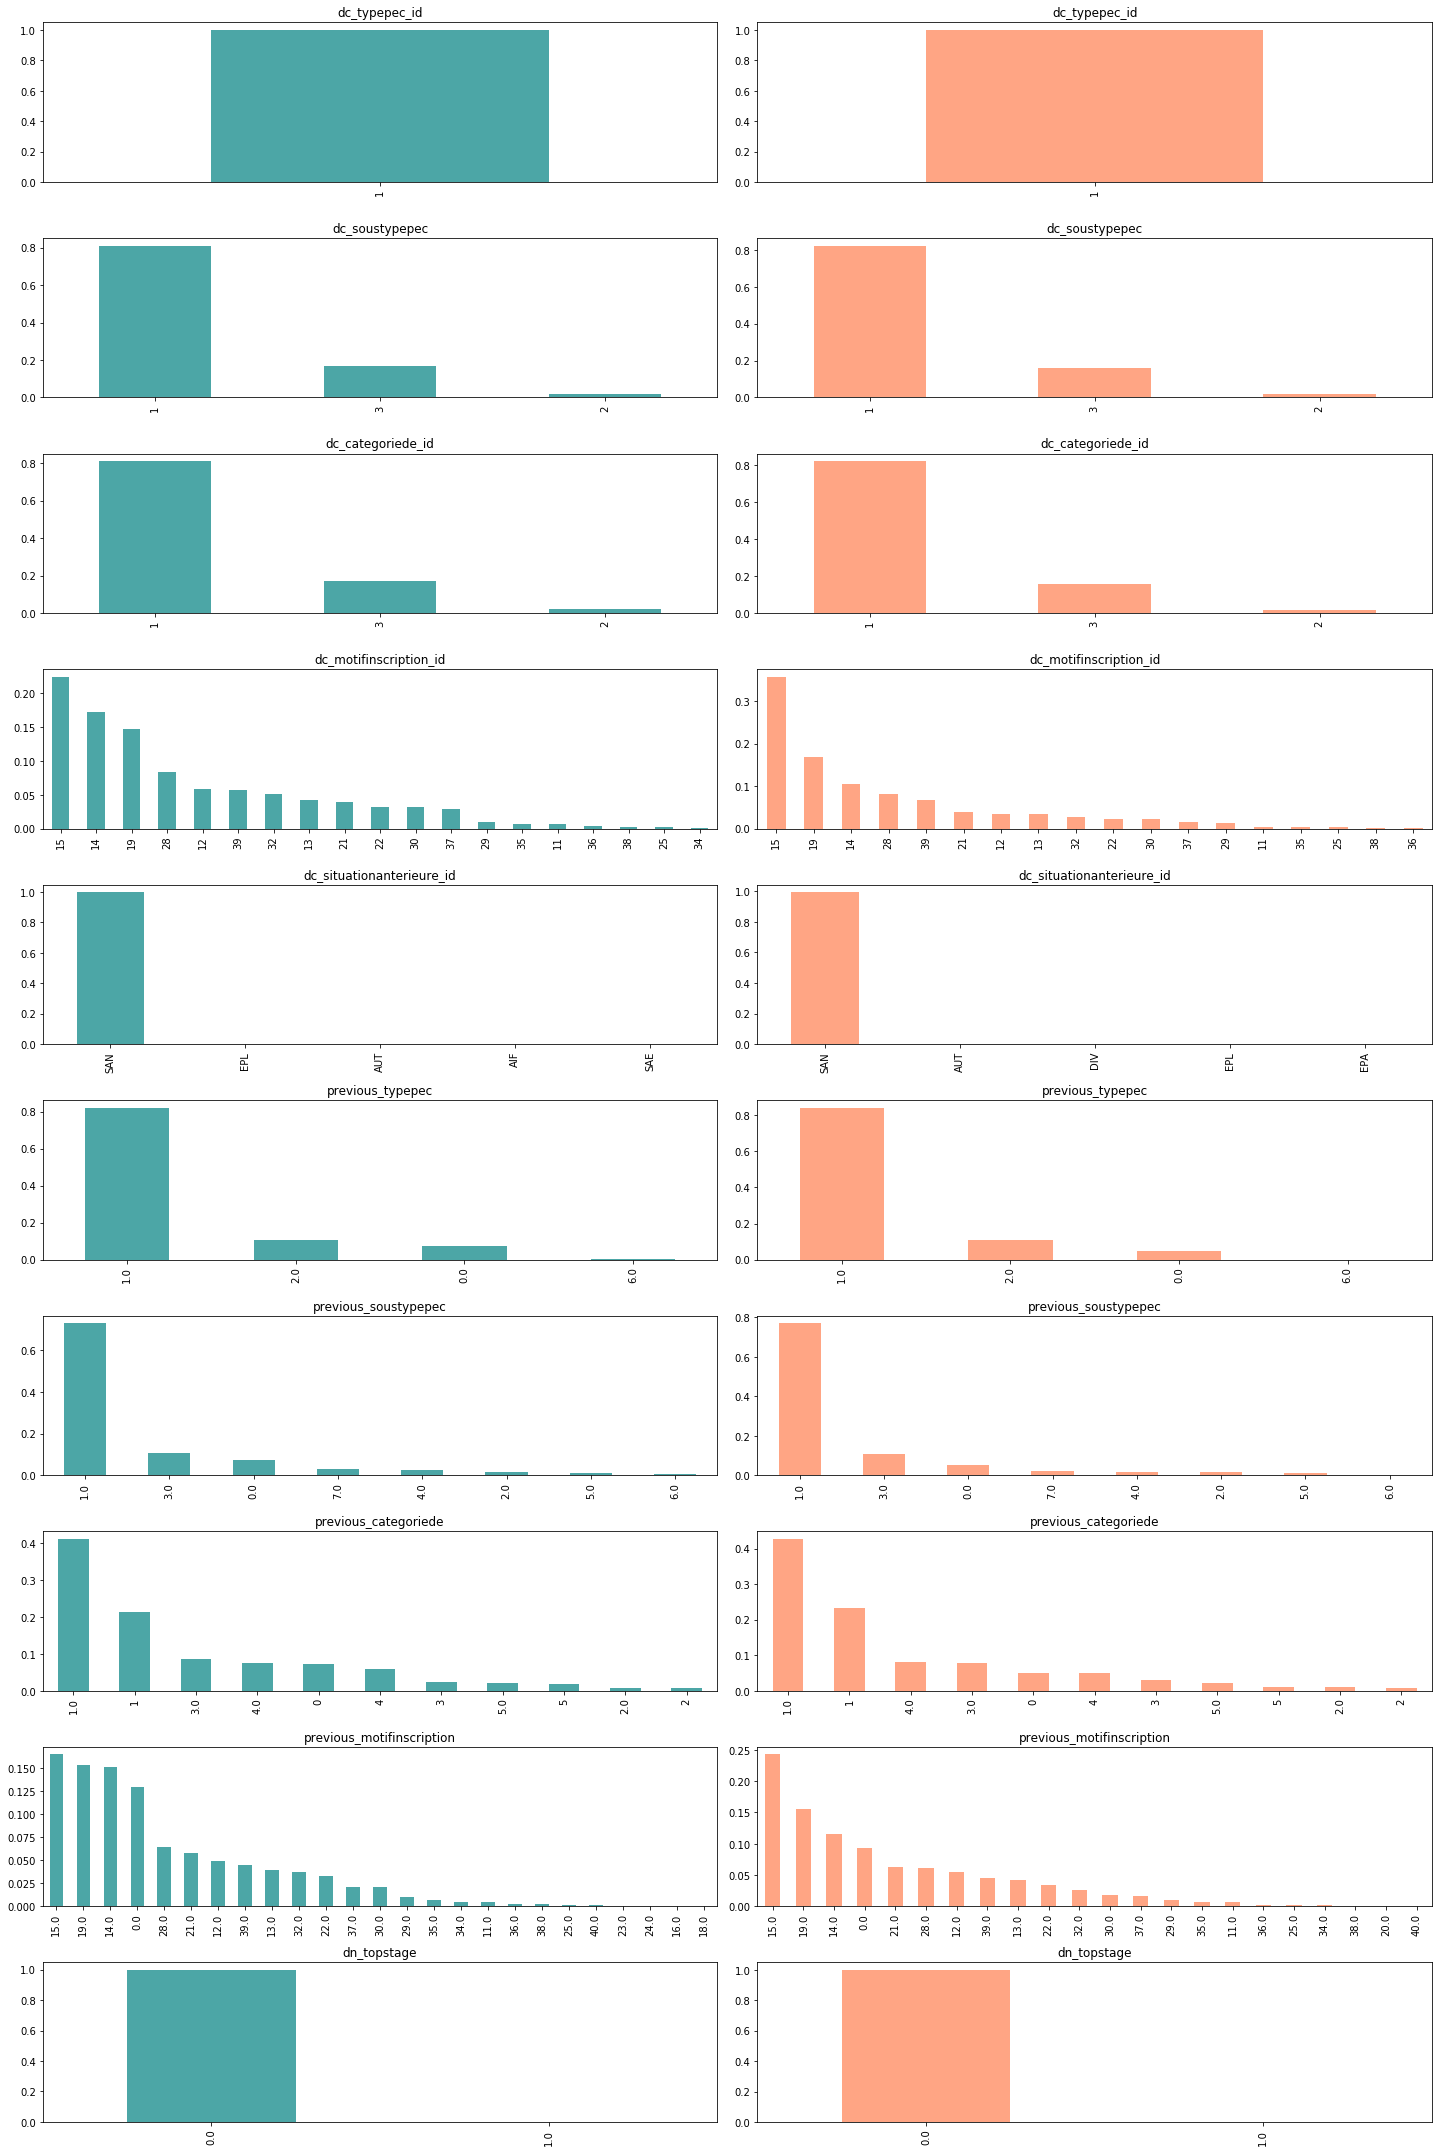

In [50]:
bar_plot_graph(df0, df1, categ_list[:10], (20, 30))

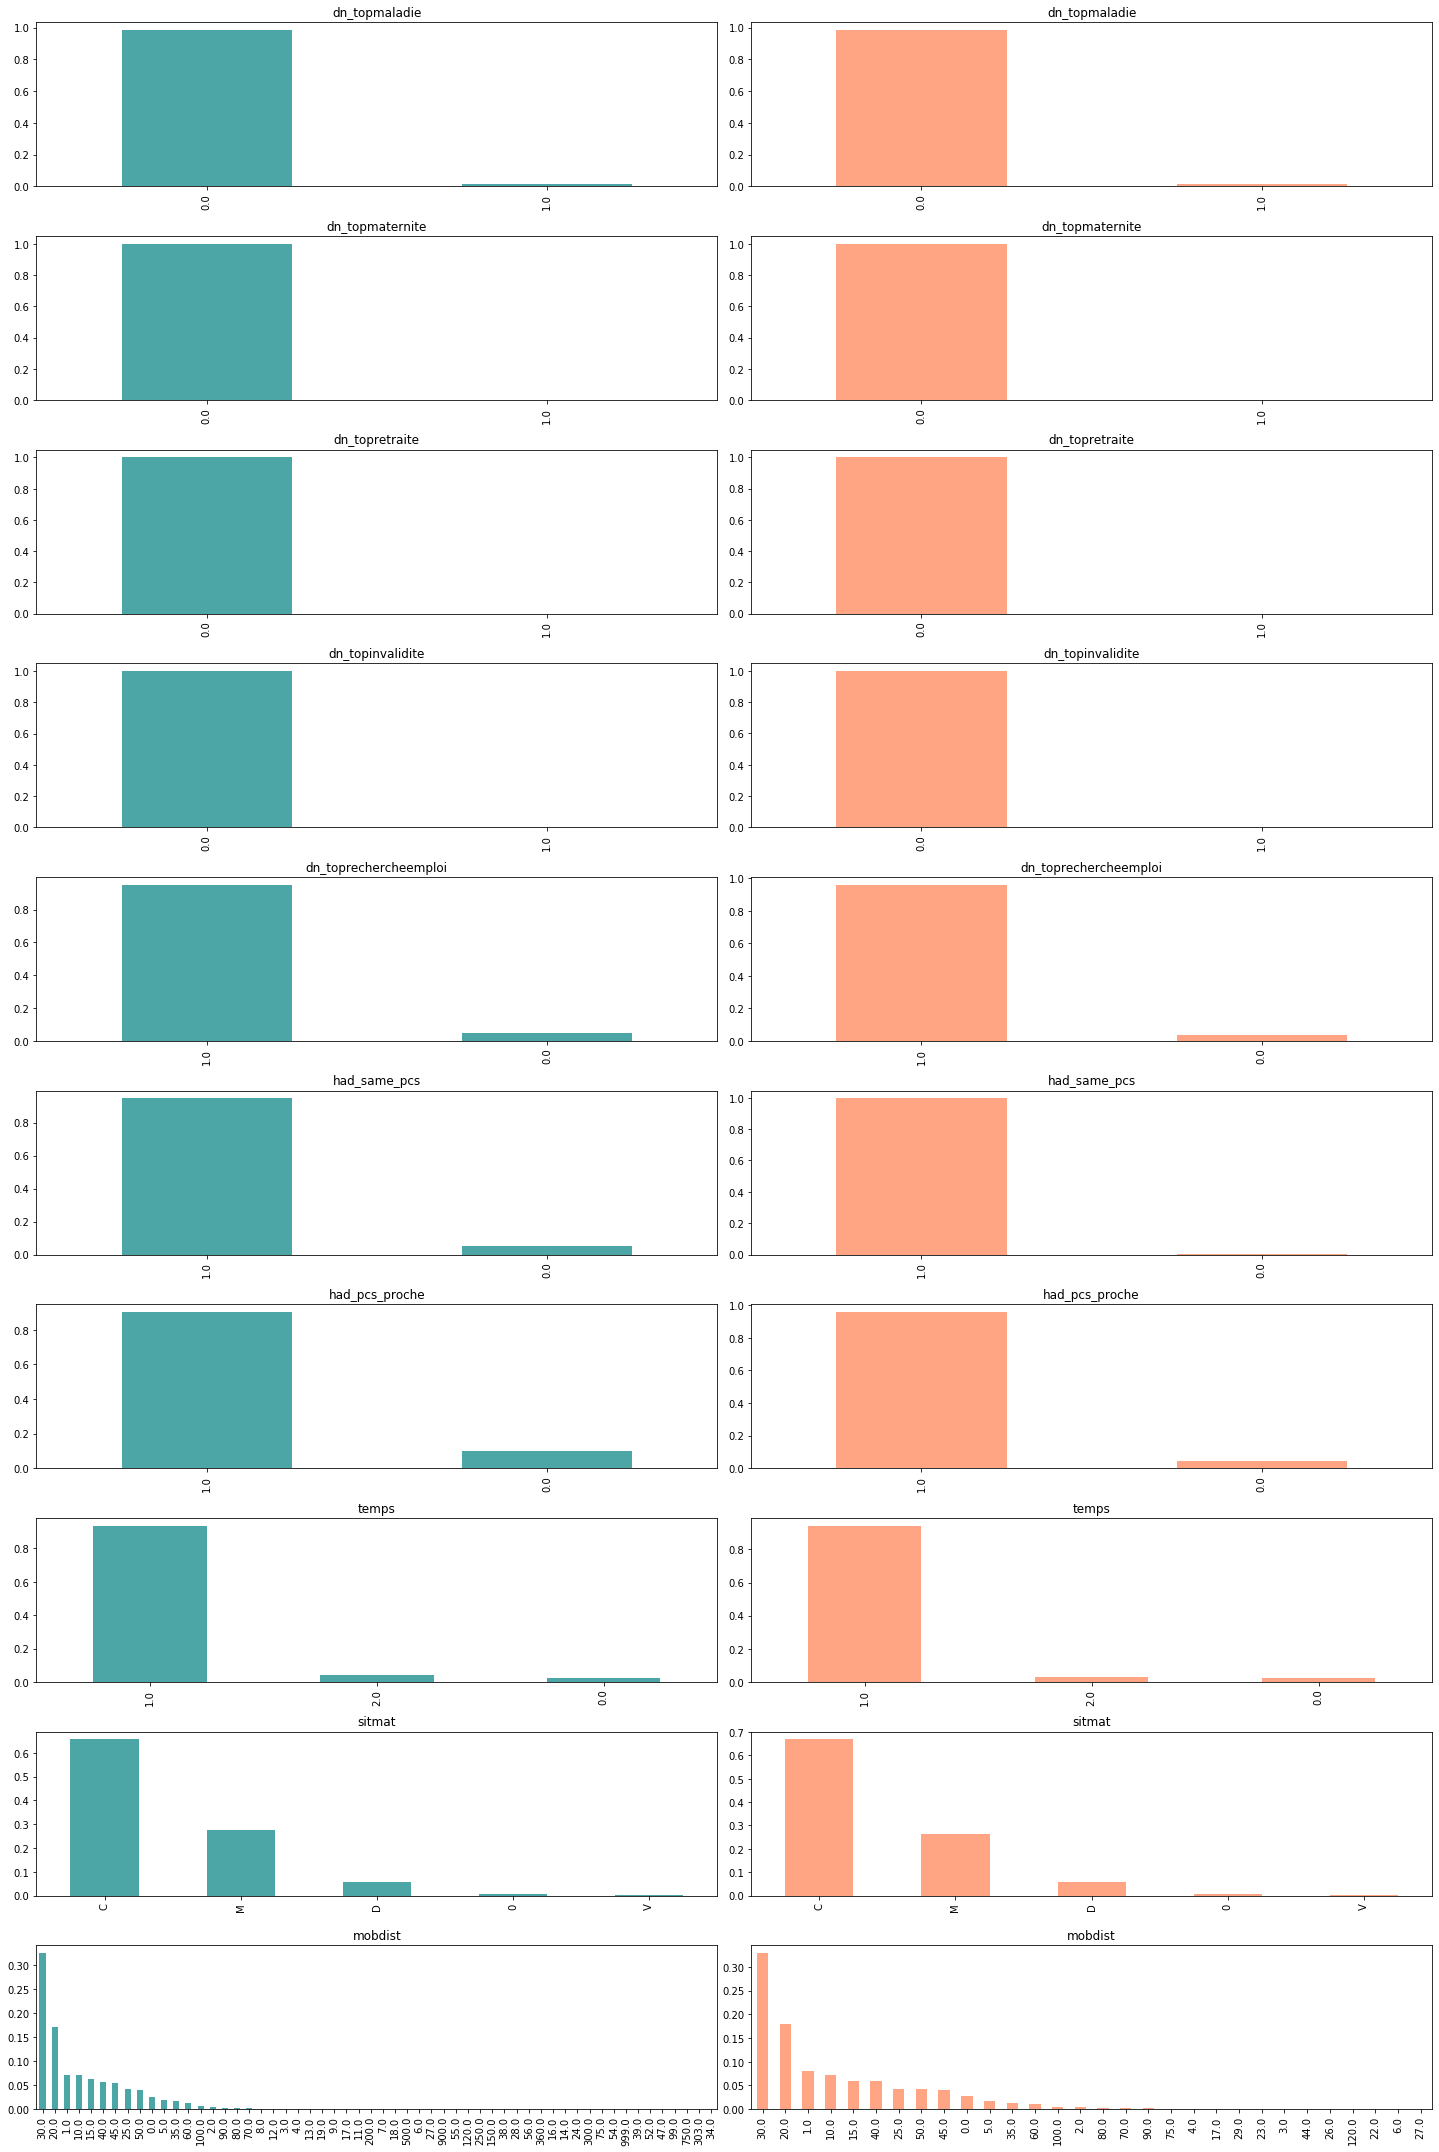

In [31]:
bar_plot_graph(df0, df1, categ_list[10:20], (20, 30))

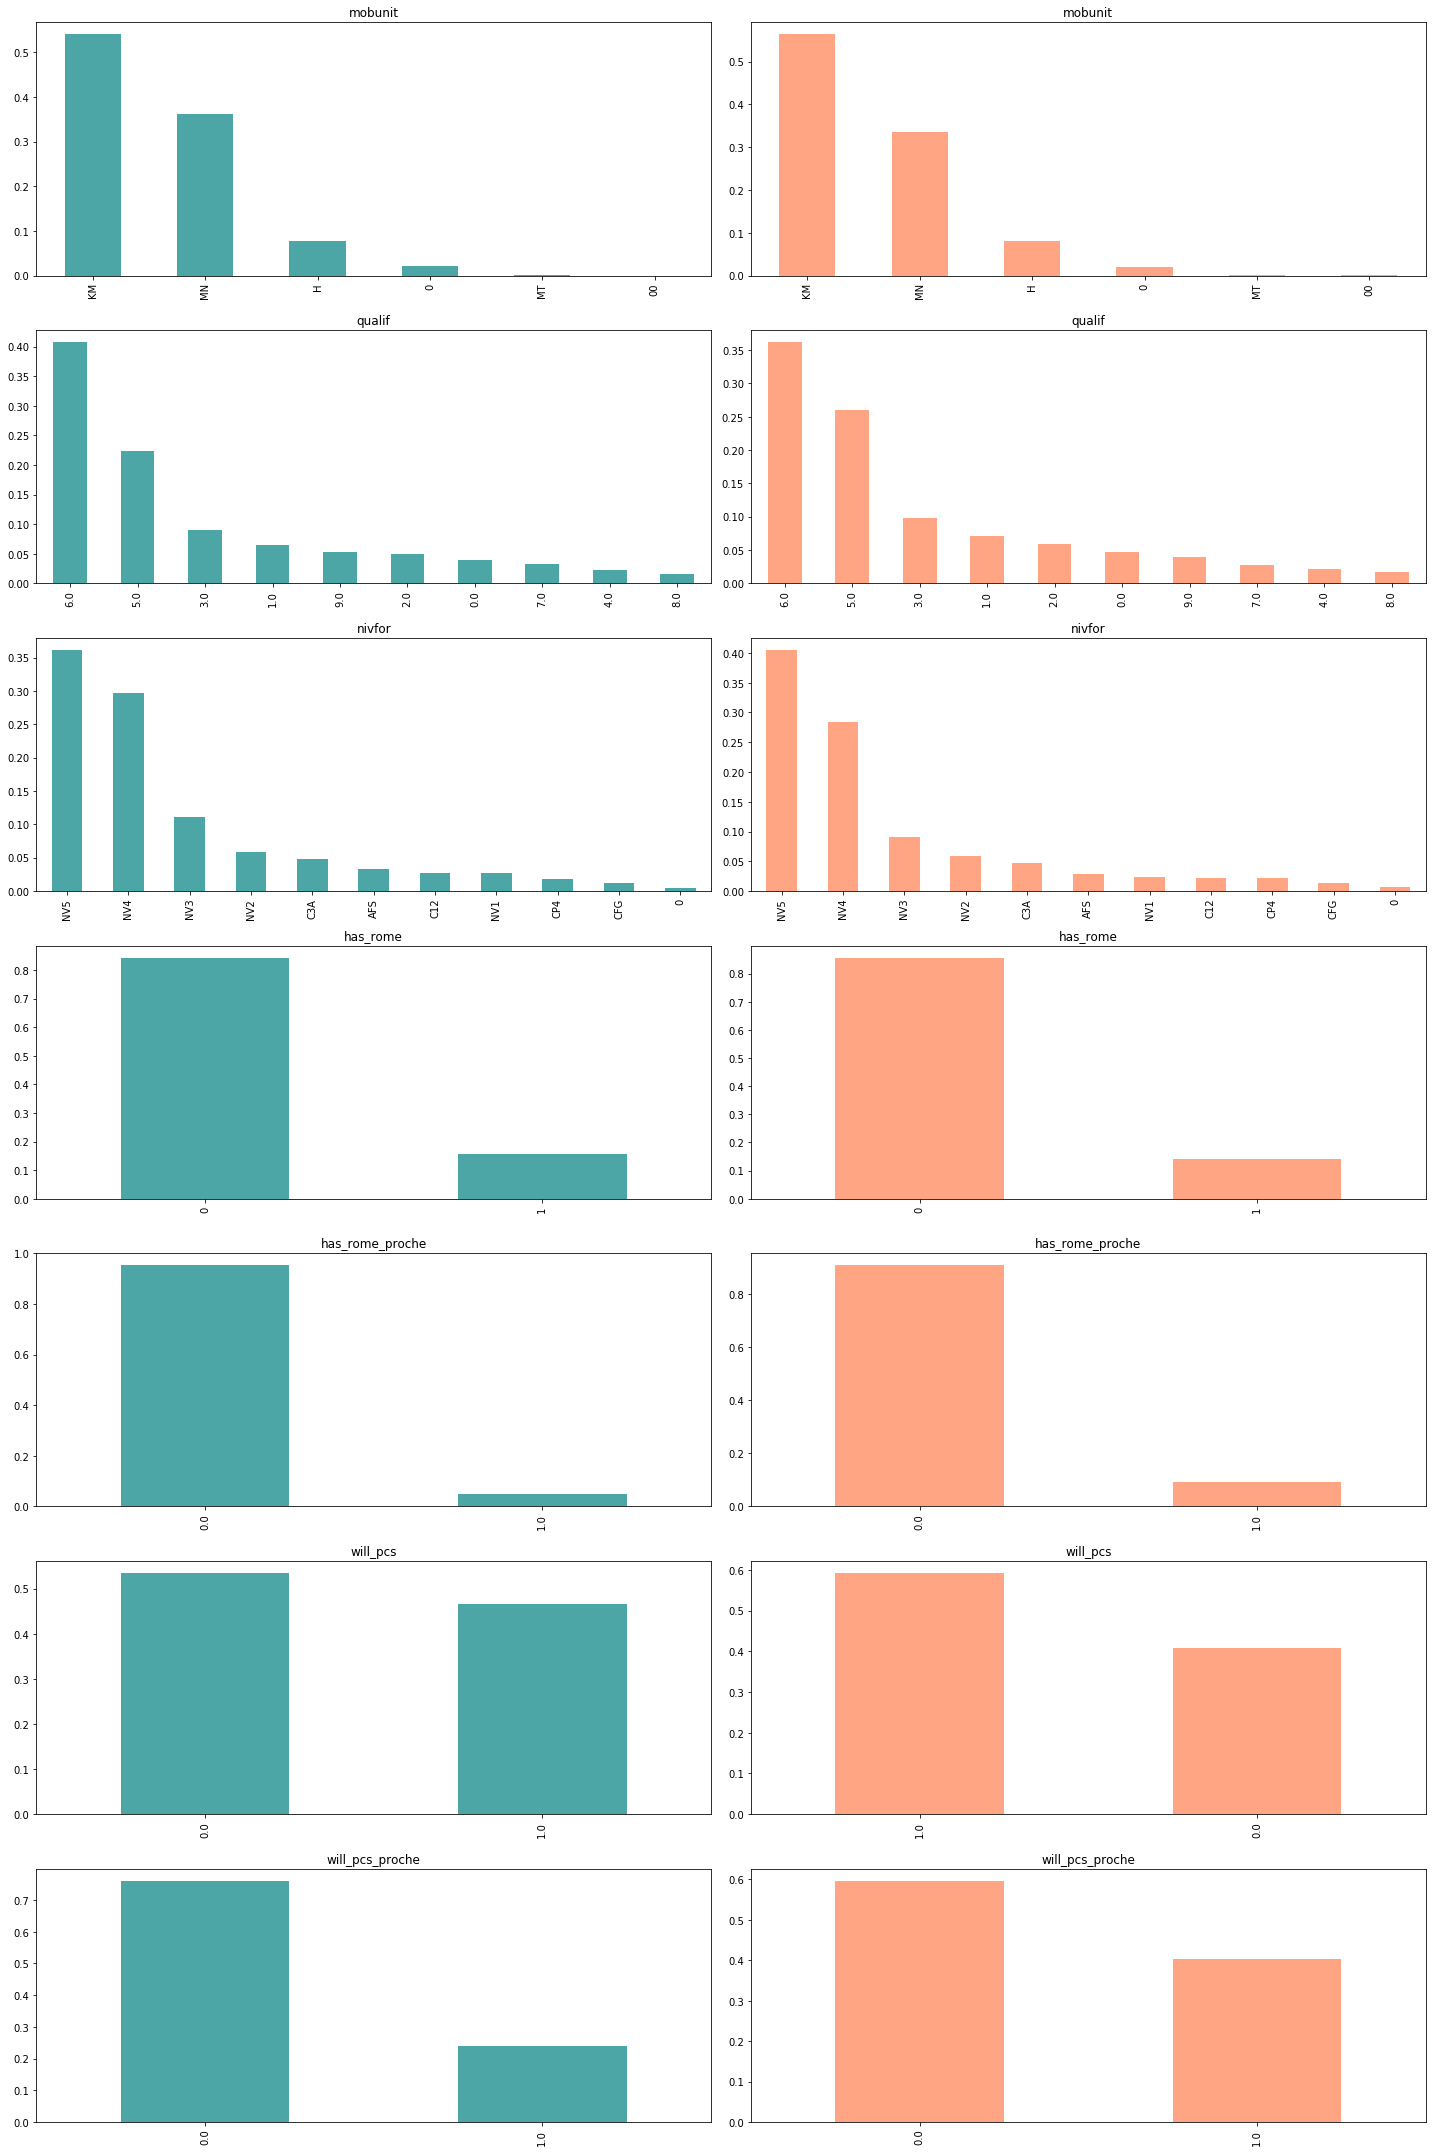

In [44]:
bar_plot_graph(df0, df1, categ_list[20:30], (20, 30))

In [122]:
cramer = pd.DataFrame(index=categ_col_to_keep, columns=["cramer_v"])

# convert to categories type
for col in categ_col_to_keep:
    df[col] = df[col].astype('category')
    cramer.loc[col, "cramer_v"] = cramers_corrected_stat(pd.crosstab(df.label, df[col]))

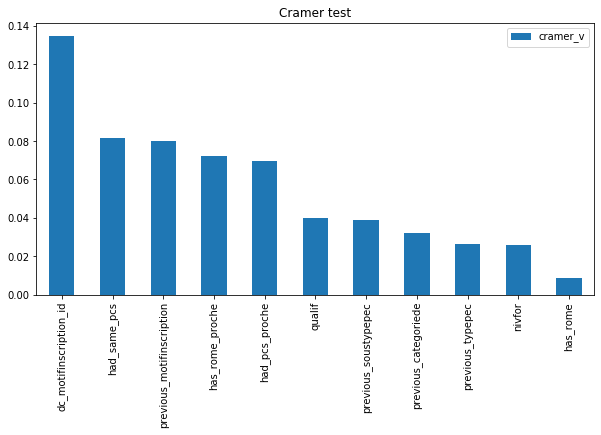

In [123]:
cramer.sort_values(by="cramer_v", ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title('Cramer test')
plt.show()

In [124]:
def boxplot_graph(df1, df2, col_list, figsize):
    """Plot bar plot graph for a list of categorical columns in the dataframe.
    """
    ncol = 2
    nrow = len(col_list)
    _, axes = plt.subplots(nrow, ncol, figsize=figsize)
    k = 0

    for j in range(nrow):
        sns.boxplot(df1[col_list[k]], ax=axes[j, 0], color='teal')
        sns.boxplot(df2[col_list[k]], ax=axes[j, 1], color='coral')
        k = k+1
    plt.tight_layout()

In [132]:
for el in num_col_to_keep:
    df[el] = df[el].abs()
    q_90 = df[el].quantile(0.9)
    df.at[df[el] > q_90, el] = q_90

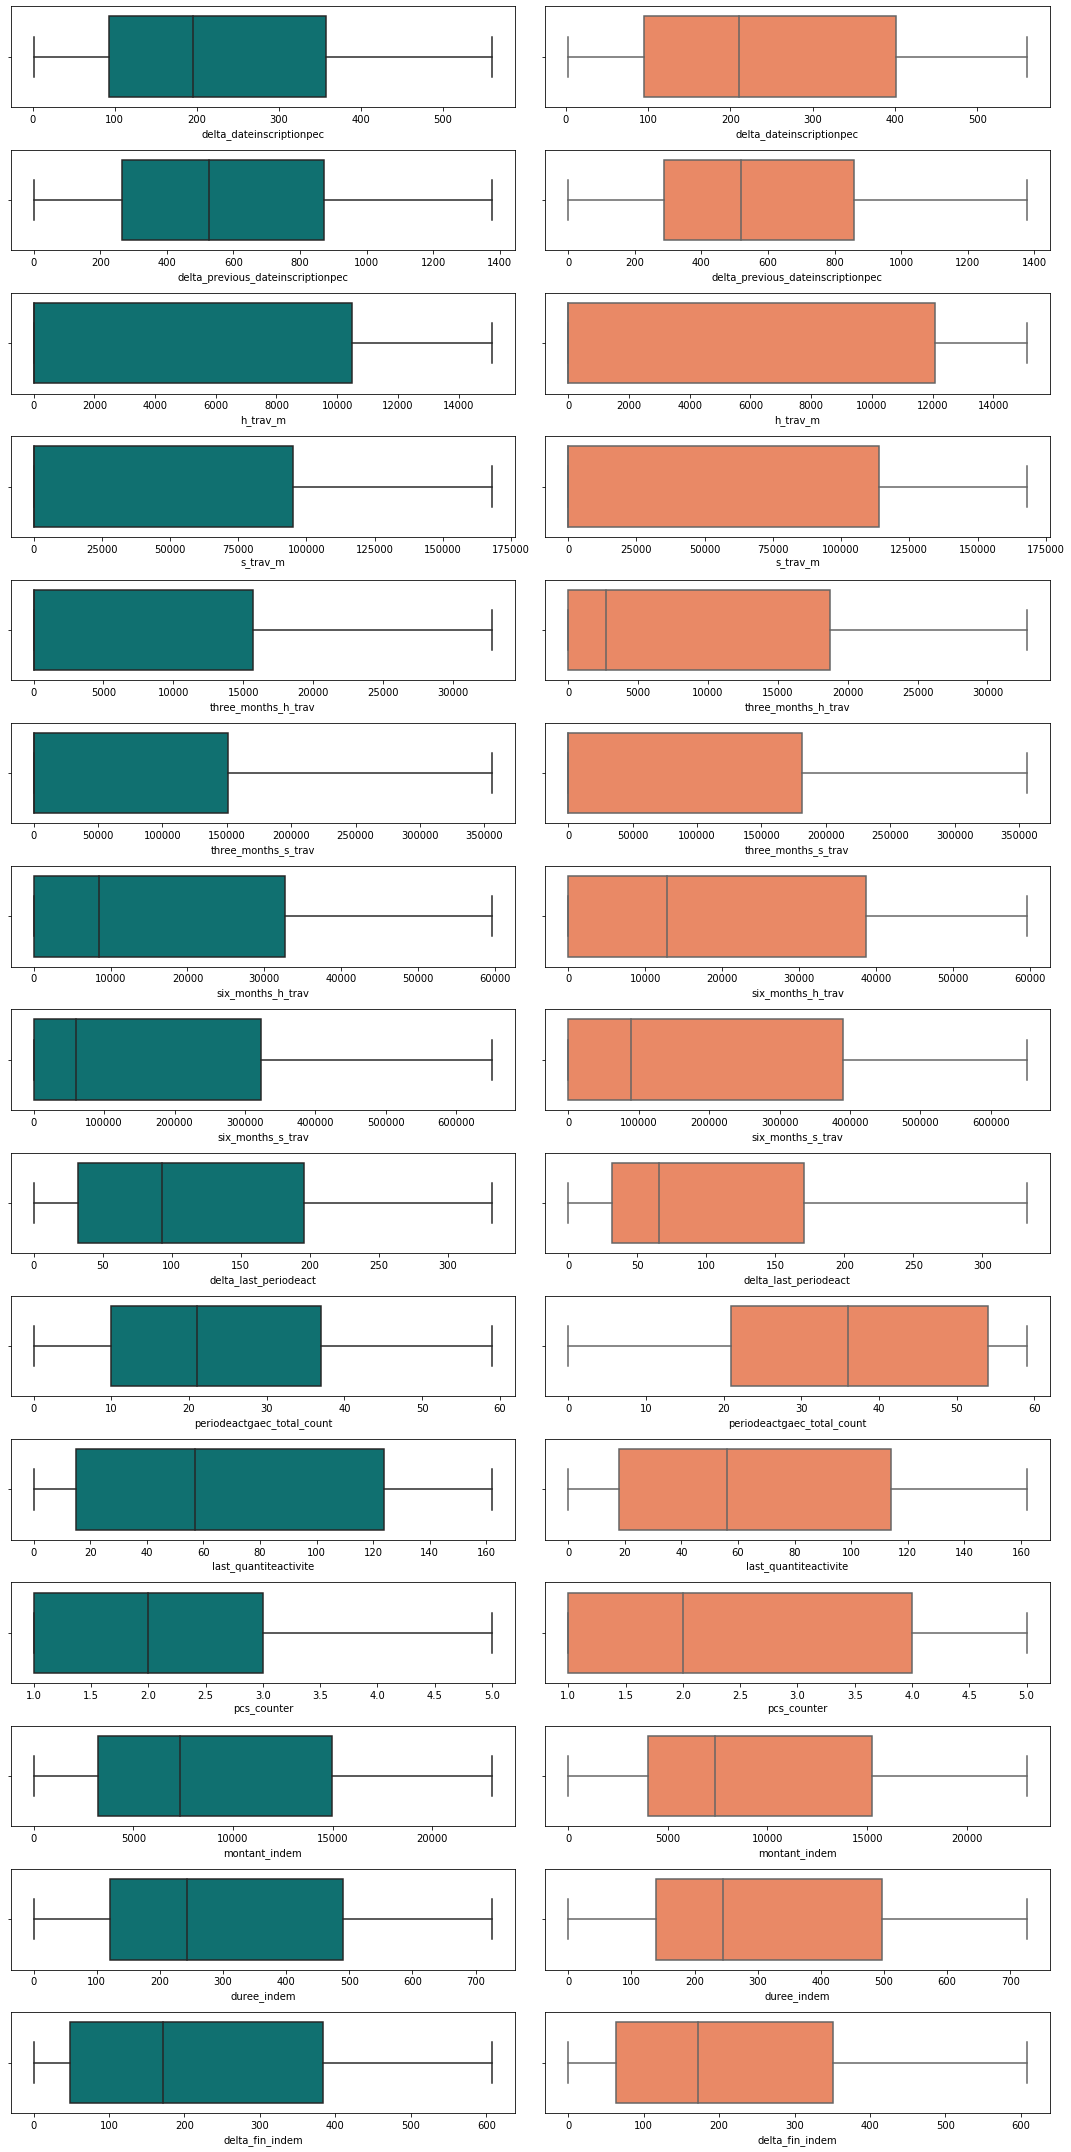

In [134]:
boxplot_graph(df0, df1, num_col_to_keep, (15, 30))